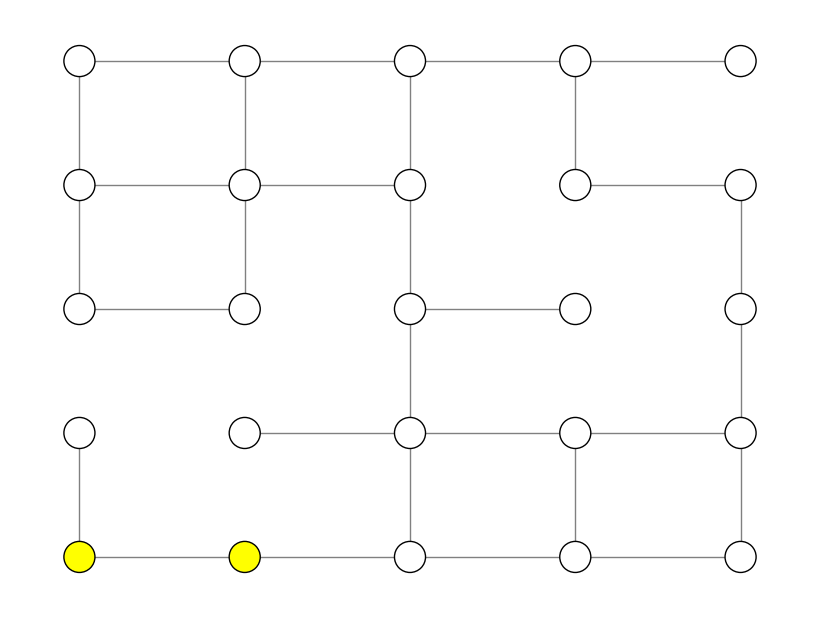

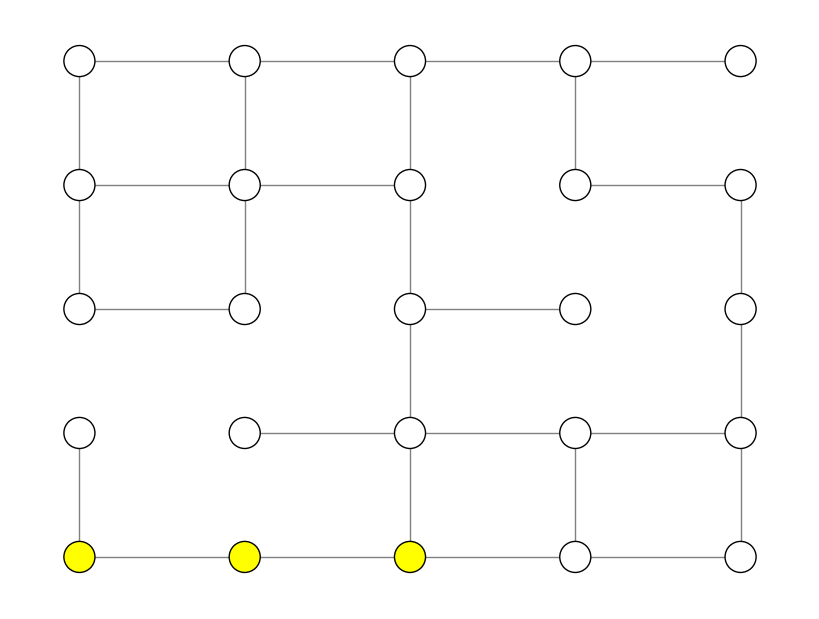

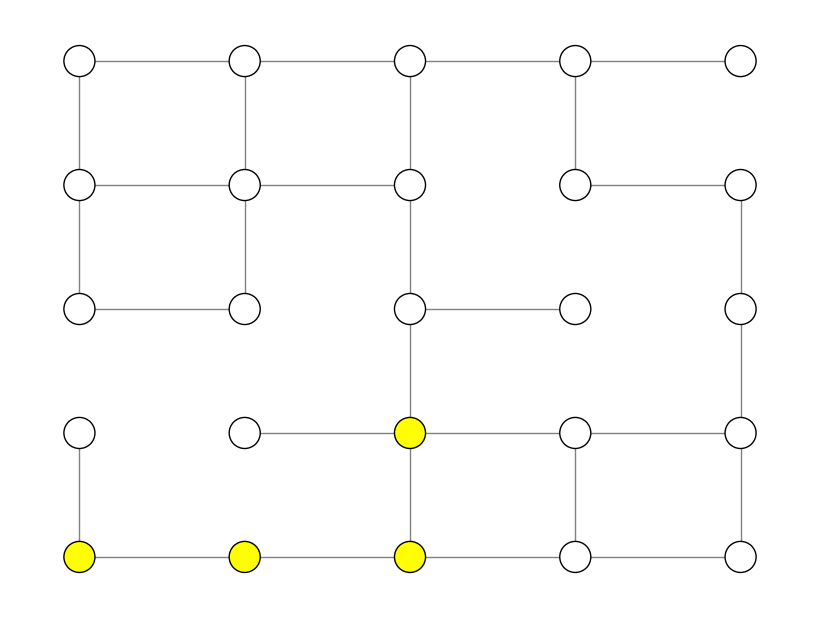

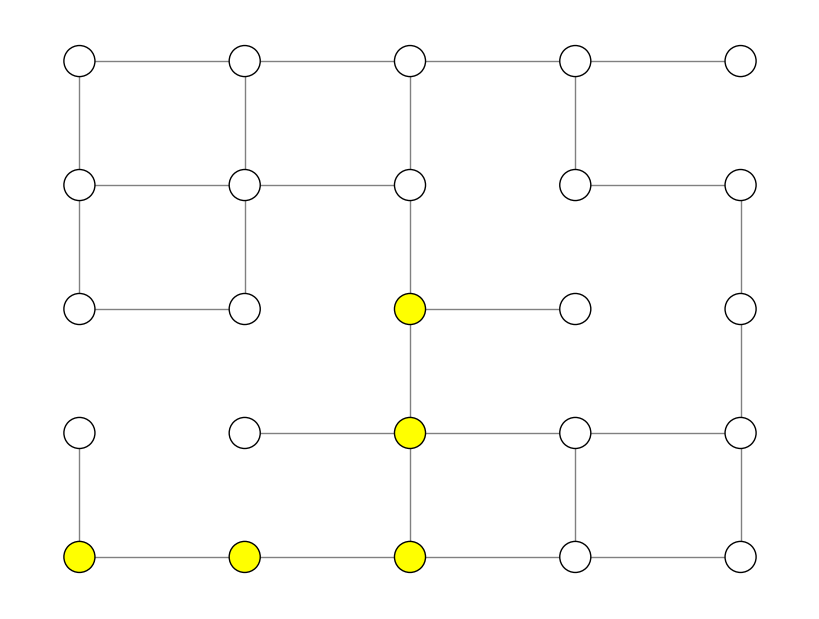

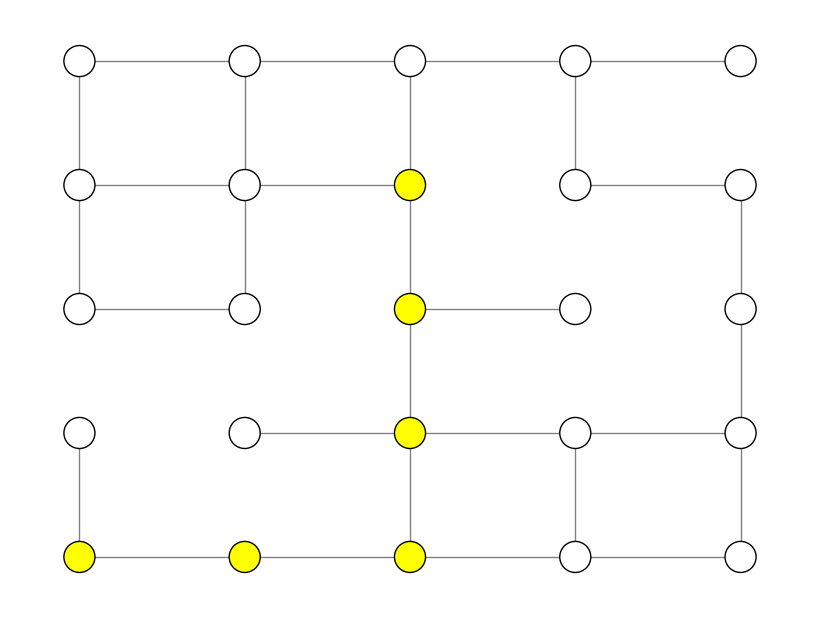

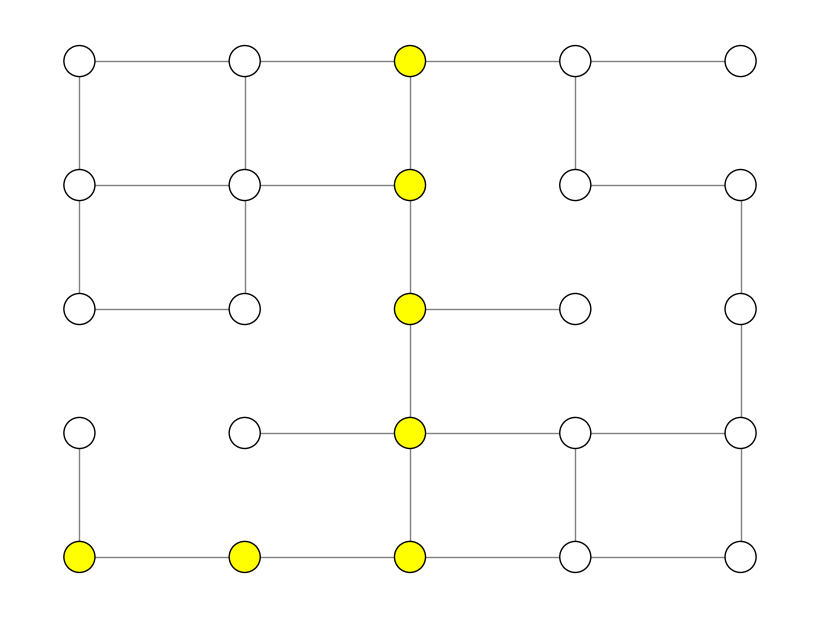

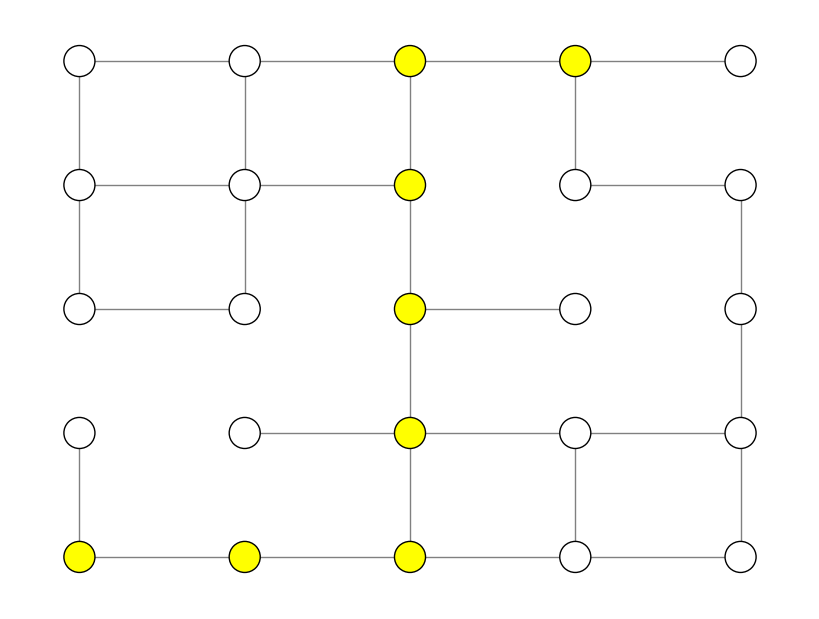

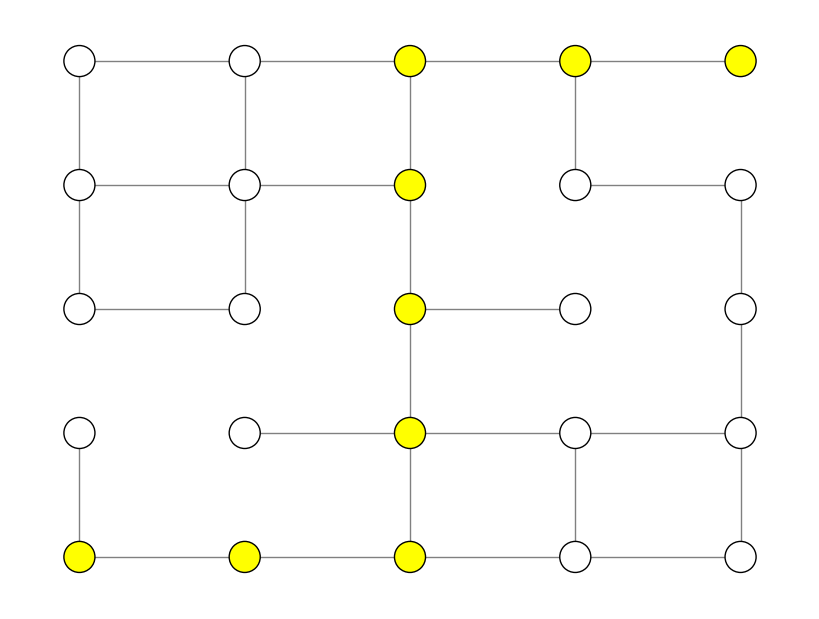

Маршрут завершено: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_removable_edges(G):
    all_edges = list(G.edges())
    
    random.shuffle(all_edges)
    
    return all_edges

def remove_edges_while_connected(G, edges_to_remove, max_edges_to_remove):
    G_copy = G.copy()
    
    removed_edges = []
    
    for edge in edges_to_remove:
        if len(removed_edges) >= max_edges_to_remove:
            break
            
        G_copy.remove_edge(*edge)
        
        if not nx.is_connected(G_copy):
            G_copy.add_edge(*edge)
        else:
            removed_edges.append(edge)
            
    return removed_edges, G_copy

def visualize_graph(G, visited_nodes=None):
    pos = {(x, y): (x, y) for x, y in G.nodes()}
    
    plt.figure(figsize=(8, 6))
    
    node_colors = ['yellow' if node in visited_nodes else 'white' for node in G.nodes()]
    
    nx.draw(G, pos, with_labels=False, node_size=500, node_color=node_colors, edgecolors='black', linewidths=1, edge_color='gray')
    
    plt.show()

# agent class
class IntelligentAgent:
    def __init__(self, G, start, goal):
        self.G = G
        self.current_position = start
        self.goal = goal
        self.visited_nodes = {start}
        self.path = [start]

    def move_to(self, next_position):
        if next_position in self.G.neighbors(self.current_position):
            self.current_position = next_position
            self.visited_nodes.add(self.current_position)
            self.path.append(self.current_position)
            return True
        return False

    def find_path(self):
        while self.current_position != self.goal:
            path = nx.astar_path(self.G, self.current_position, self.goal)
            next_position = path[1]
            self.move_to(next_position)
            visualize_graph(self.G, visited_nodes=self.visited_nodes)
            
        print("route completed:", self.path)

# graph parameters
G = nx.grid_2d_graph(5, 5)
max_edges_to_remove = 10
edges_to_remove = generate_removable_edges(G)
removed_edges, G_removed = remove_edges_while_connected(G, edges_to_remove, max_edges_to_remove)

# initialization of agent
start = (0, 0)
goal = (4, 4)
agent = IntelligentAgent(G_removed, start, goal)
agent.find_path()
